In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from core_dictionary import *
import scipy.special
import sympy as spy
%matplotlib inline
from sklearn.linear_model import LassoCV
spy.init_printing()
from sympy import pretty_print

In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

SMALL_SIZE = 11
MEDIUM_SIZE = 13
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
# Import real data 

capitais_df = pd.read_csv("number_cases_01_06_20.csv");  # Confirmed number of infected individuals per capital city
table_pop = pd.read_csv("population_capital.csv");  # Estimative of population size - 2019
mobility_data_df = pd.read_csv("Social_Distancing_Index_by_Cities.csv") # Mobility data - fraction of population staying at home up to 21_05_20
# Additionally, there is an updated version of this data up to June 2020.
mobility_data_df = mobility_data_df.rename(columns={'dt':'Data'})
capitais_df['Data'] = capitais_df['Data'].str.replace(' ', '')

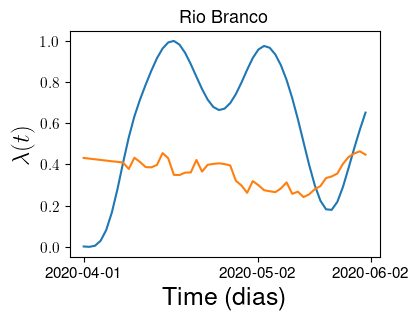

0.9704120607366971
0.465*T_t + 0.96*lambda_t - 0.042*xi_t


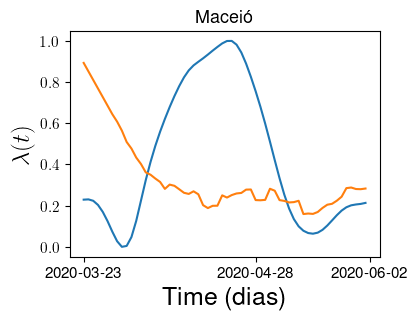

0.9797762503879135
0.034*lambda_t**2 + 0.94*lambda_t


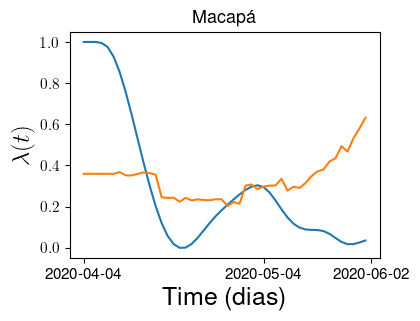

0.988846396253377
-0.103*T_t + 0.263*lambda_t**2 + 0.682*lambda_t + 0.011*xi_t


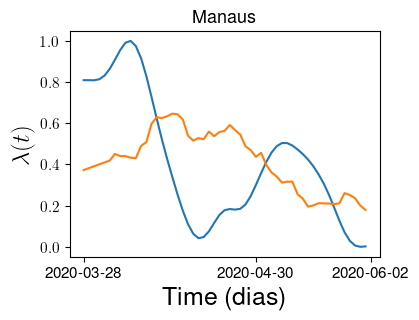

0.9766653922479863
0.088*lambda_t**2 + 0.87*lambda_t


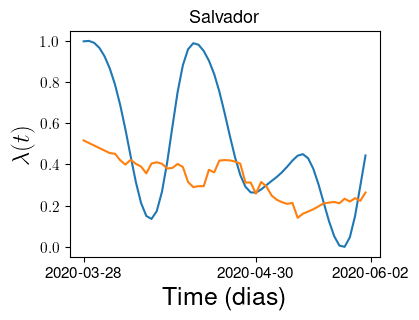

0.9343818871223923
0.152*lambda_t**2 + 0.763*lambda_t


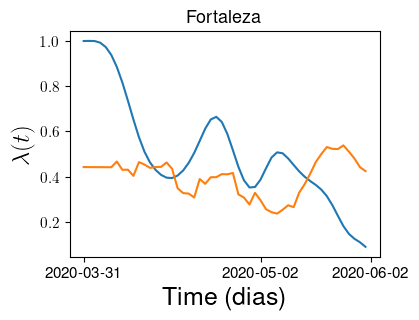

0.9840892270232587
0.018*S_t**2 - 0.193*S_t*T_t - 0.07*S_t*lambda_t + 0.11*S_t - 0.229*T_t**2 - 0.081*T_t + 0.159*lambda_t**2 + 0.005*lambda_t*xi_t + 0.78*lambda_t + 0.233*xi_t**2


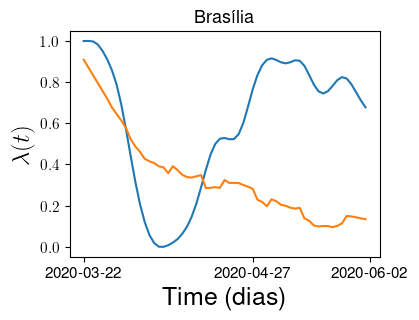

0.991556831784999
-0.455*T_t**2 + 1.175*T_t*lambda_t - 0.702*T_t + 0.106*lambda_t**2 + 0.447*lambda_t


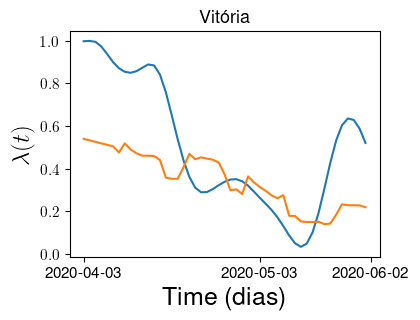

0.9722628204634157
0.113*lambda_t**2 + 0.818*lambda_t


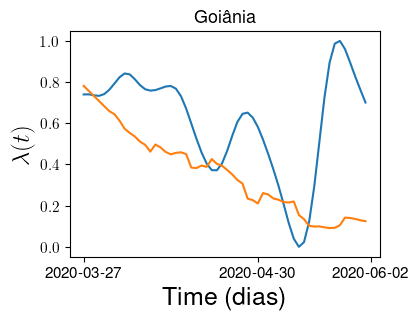

0.9229421760926405
-0.007*S_t*lambda_t + 0.068*T_t**2 - 0.07*T_t + 0.952*lambda_t


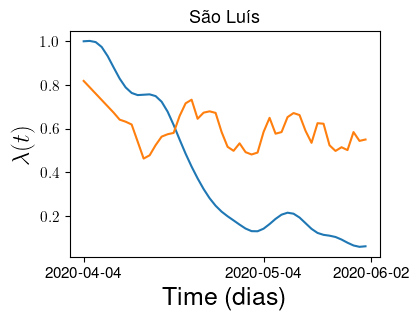

0.9964742887236665
0.167*lambda_t**2 + 0.795*lambda_t


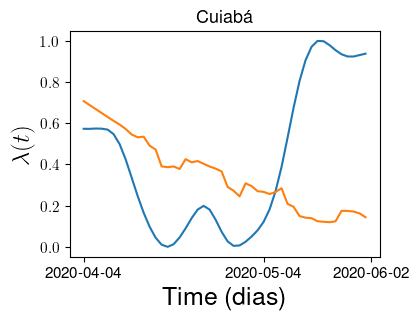

0.9724457344649393
0.965*lambda_t


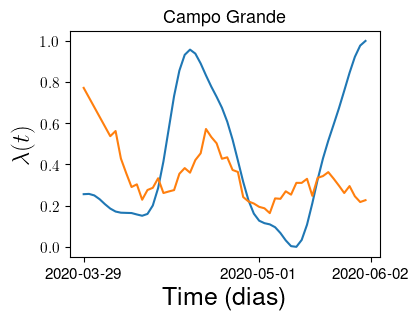

0.9663432602508933
-0.454*T_t*lambda_t - 0.071*lambda_t**2 + 1.237*lambda_t + 0.042*xi_t


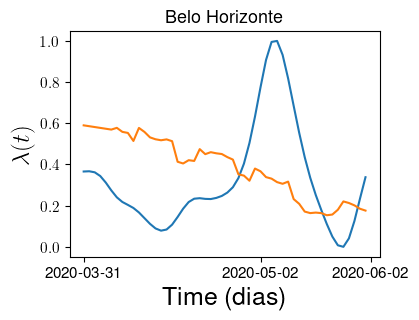

0.9343685712917731
0.943*lambda_t


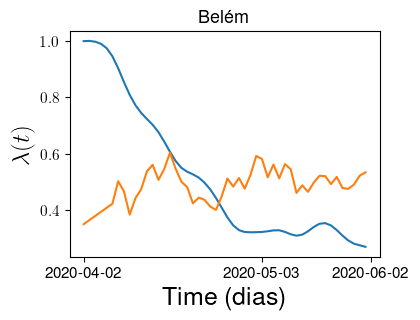

0.9976343773614831
0.192*lambda_t**2 + 0.726*lambda_t


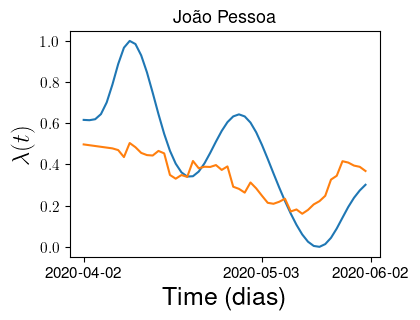

0.973417963096347
0.326*T_t + 0.034*lambda_t**2 + 0.864*lambda_t


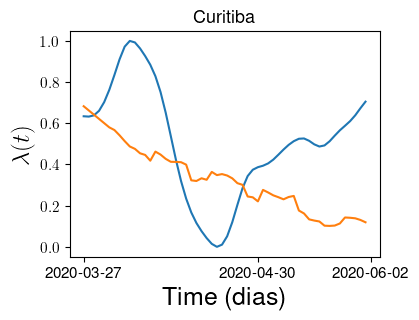

0.9654085770352592
0.941*lambda_t


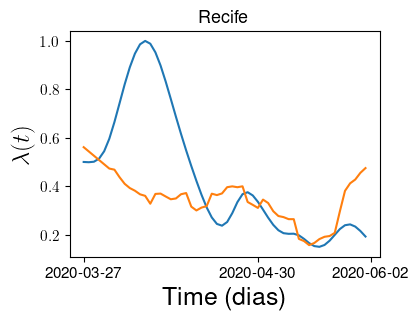

0.9908730271963896
-0.001*S_t - 0.292*T_t**2 + 1.463*T_t*lambda_t + 0.326*lambda_t**2 - 0.176*lambda_t*xi_t + 0.064*lambda_t + 0.06*xi_t**2


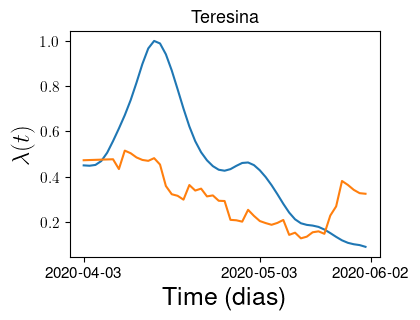

0.9744460514257759
0.002*T_t + 0.963*lambda_t


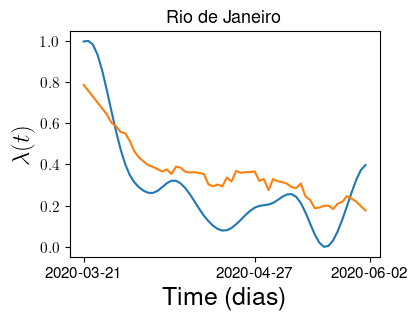

0.9784622484960641
0.076*lambda_t**2 + 0.831*lambda_t


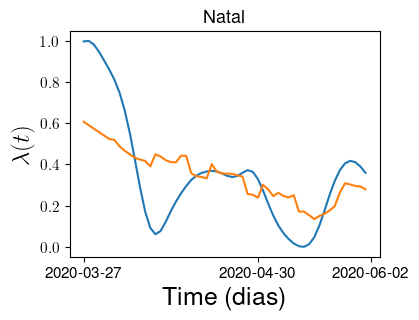

0.9684767457345725
0.075*lambda_t**2 + 0.842*lambda_t


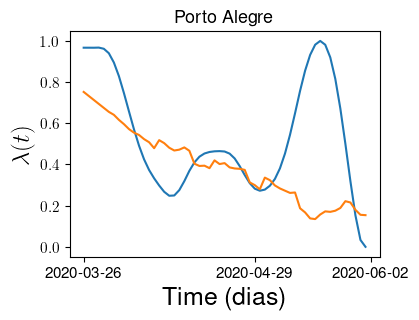

0.9363271594502562
0.199*lambda_t**2 + 0.691*lambda_t


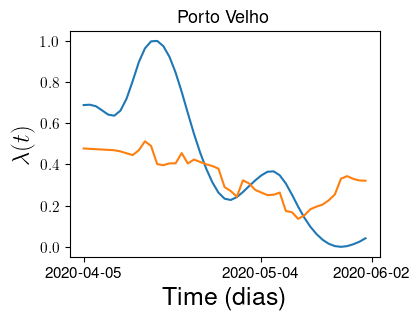

0.9782079217706908
0.043*lambda_t**2 + 0.927*lambda_t


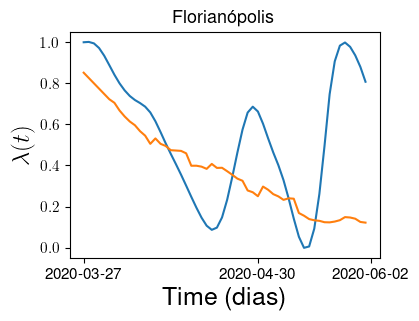

0.9336393436341976
0.074*lambda_t**2 + 0.83*lambda_t


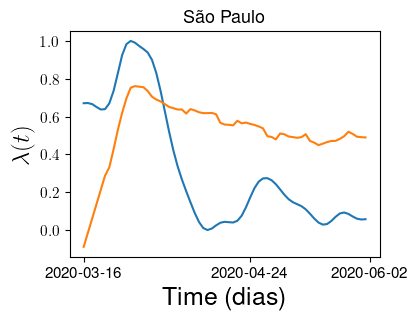

0.9928369281191759
-0.001*S_t - 0.09*T_t**2 + 0.272*lambda_t**2 + 0.3*lambda_t*xi_t + 0.723*lambda_t


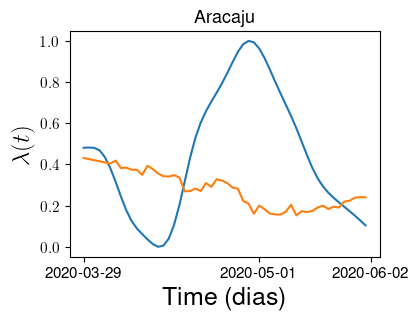

0.9723268701181741
0.058*lambda_t**2 + 0.917*lambda_t


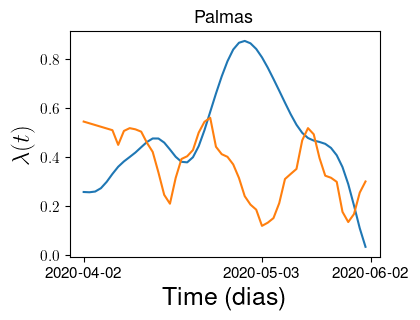

0.9897345428915125
0.039*T_t*lambda_t + 0.245*T_t + 0.006*lambda_t**2 + 1.061*lambda_t - 0.006*xi_t


In [12]:
capital_names = ["Rio Branco", "Maceió", "Macapá", "Manaus", "Salvador", "Fortaleza", "Brasília",  "Vitória",
 "Goiânia", "São Luís", "Cuiabá", "Campo Grande", "Belo Horizonte", "Belém", "João Pessoa", "Curitiba", "Recife",
 "Teresina", "Rio de Janeiro", "Natal", "Porto Alegre", "Porto Velho", "Florianópolis", "São Paulo", "Aracaju", "Palmas"];


order = 2 # Maximum degree of polynomial expansion
normalization = 0  # Normalization condition over columns of the dictionary matrix
crossed_terms_condition = 1 # Allow for all possible combinations of polynomial terms for Dictionary matrix construction    
N = 4  # Number of variables
L = np.sum(np.fromiter((scipy.special.factorial(l + N - 1)/(scipy.special.factorial(N - 1)*scipy.special.factorial(l)) for l in range(0, order + 1)), float))
#L is the number of terms in the polynomial expansion
if(np.mod(N, 2) == 1):
    L = int(np.ceil(L))   
else:
    L = int(L)

x_t = [spy.symbols('lambda_t'), spy.symbols('T_t'), spy.symbols('S_t'), spy.symbols('xi_t')]  # Symbolic representation of the variables
# T_t  - trending variable in respect to the mobility time series
#S_t - seasonal variable in respect to the mobility time series
#xi_t - resid variable in respect to the mobility time series

symbolic_Design_matrix = Design_matrix(x_t, len(x_t), 1, order) # Symbolic dictionary matrix

PHI_symbolic = spy.Matrix(symbolic_Design_matrix,evaluate=False)  # 

# Temporarily removed from analysis: "Boa Vista"
#====================================================#
time_window = 14   # Rolling average parameter set to be 14 days 
time_window_infectious = 3  # Average time a person is infectious. This is an educated guess. This needs to be based on the literature.


time_shift = False # It determines if there is a shift along time between both time series: reproduction number and mobility

for cap_nam in capital_names:
    selected_city = cap_nam
    num_of_infected_selected_city = np.absolute(capitais_df[selected_city].values)
    
    locate_start = np.argwhere(np.isnan(num_of_infected_selected_city))[:, 0]
    if(len(locate_start) > 0):
        index_date_start = locate_start[-1]
    else:
        index_date_start = 0
    data_start = capitais_df['Data'].values[index_date_start]
    data_end = capitais_df['Data'].values[len(capitais_df['Data']) - 1]

    temp_cases = capitais_df[selected_city].to_numpy()
    pre_cases = temp_cases

    new_cases = [np.mean(pre_cases[i:(i + time_window - 1)]) for i in range(len(capitais_df['Data']) - time_window + 1)]
    new_cases = pd.DataFrame(new_cases)
    infected_people = new_cases.rolling(time_window_infectious).sum()
    infected_people = np.nan_to_num(infected_people.to_numpy())

    densi_pop_city = table_pop[selected_city].values[0]
    inicio = -1
    for i in range(len(infected_people)):
        if(infected_people[i] > 1.0e-6*densi_pop_city):   # Select an miminum number of infected people to be reasonable for optimization
            inicio = i
            break

    prop_infected_people = infected_people[inicio : ]/densi_pop_city
    prop_infected_people = np.array(prop_infected_people[prop_infected_people > 0])
    #np.savetxt("infectados_{}.txt".format(selected_city), prop_infected_people)

    rt_est_array = np.loadtxt("rt_est_capitals/rt_est_{}.txt".format(cap_nam))    #import reproduction number time series from Julia program - wrapper_julia_output.jl
        
    dates = capitais_df['Data'].values[time_window - 1:]
    if(index_date_start > inicio):
        dates = dates[index_date_start:]
    else:
        dates = dates[inicio:]
        
    mobility_data_city_df = mobility_data_df.loc[mobility_data_df['city_name'] == cap_nam]
    
    mobility_data_city = np.flip(mobility_data_city_df['isolated'].values)  # Fix the cronological order of mobility data
    date_mobility = np.flip(mobility_data_city_df['Data'].values)
    locate_start = np.argwhere(date_mobility == dates[0])
    if(len(locate_start) > 0):
        index_mobility_start = locate_start[0, :][0]    
    index_mobility_end = np.argwhere(dates == date_mobility[-1])[0, :][0]   
    
    #Complete lambda with 2.5 for past dates in respect to mobility
    
    #Normalize the reproduction number time series    
    normalized_rt_est = (rt_est_array - np.min(rt_est_array))/(np.max(rt_est_array) - np.min(rt_est_array))
    normalized_rt_est = normalized_rt_est[ : index_mobility_end + 1]
    
    #mobility_data_ = mobility_data_city[index_mobility_start - time_window :index_mobility_start + index_mobility_end + 1 -time_window] 
    mobility_data_ = mobility_data_city[index_mobility_start :index_mobility_start + index_mobility_end + 1] 
    
    #Normalize the mobility time series
    normalized_mobility = (mobility_data_ - np.min(mobility_data_))/(np.max(mobility_data_) - np.min(mobility_data_))
    mobility_data_result = seasonal_decompose(normalized_mobility, model='aditive', period=7, two_sided = False, extrapolate_trend='freq')
    
    T_t = mobility_data_result.trend   #Trend from mobility time series

    S_t = mobility_data_result.seasonal  #Seasonal from mobility time series

    Resid_t = mobility_data_result.resid  #Resid from mobility time series
                  
    if(len(dates[:index_mobility_end + 1]) == len(normalized_mobility)):
        plt.figure(figsize=(4, 3), dpi=100, facecolor='w', edgecolor='k')
        plt.plot(dates[:index_mobility_end + 1], normalized_rt_est)
        plt.plot(dates[:index_mobility_end + 1], T_t)
        plt.title(r'{}'.format(selected_city))
        plt.xlabel('Time (dias)')
        plt.ylabel(r'$\lambda(t)$')
        #plt.ylim(0.0, 3.0)
        plt.xticks([dates[0], dates[int(len(dates)*0.5)],dates[int(len(dates) - 1)]])
        plt.show()

    #FIRST TRIAL: 
    #The time series is a function depending only on the variables at one step back in time
    X_t = np.vstack((normalized_rt_est[ :-1], T_t[: -1], S_t[ : -1], Resid_t[ : -1])).T
    r_map_t = normalized_rt_est[1 : ] # select one time forward of the reproduction number
    PHI_matrix, power_indices = Dictionary_matrix(X_t, len(X_t[0, :]), len(X_t[:, 0]) , order, normalization, crossed_terms_condition) 
    reg = LassoCV(cv=5, random_state=0).fit(PHI_matrix, r_map_t) # We choose the regression under L1 regularizer to minimize 
                                                                 # the number of coefficients of the polynomial expansion
    print(reg.score(PHI_matrix, r_map_t))
    coefficients_vector = np.around(reg.coef_, 3)
    coefficients_ = spy.Matrix(coefficients_vector)
    expr = PHI_symbolic.dot(coefficients_)  # expr in symbolic representation
    print(expr)

In [10]:
index_arg_max

44